# Payment Date Prediction 


### Importing related Libraries 

In [1352]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import plotly.express as px

### Store the dataset into the Dataframe


In [1353]:
df=pd.read_csv("dataset.csv")
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Check the shape of the dataframe


In [1354]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [1355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [1356]:
Columns=df.columns
Columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [1357]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [1358]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [1359]:
Missing_Percentage=df.isnull().sum()/len(df)*100
Missing_Percentage

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [1360]:
df[['invoice_id','doc_id']]
#id=df[['invoice_id','doc_id']]
#id[id.duplicated()]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [1361]:
#print(Date.duplicated())
def to_int(num):
    return int(num)
Date=df[['baseline_create_date','document_create_date','document_create_date.1']]
Date['baseline_create_date']=Date['baseline_create_date'].apply(lambda x:to_int(x))
Count=0
print(Date['baseline_create_date'].is_unique)
print(Date['document_create_date'].is_unique)
print(Date['document_create_date.1'].is_unique)
# There is Duplicate Data
# This Shows there is Duplicate Values in eachh rows
for i in range(len(Date)):
    int(i)
    if Date['baseline_create_date'].iloc[i] == Date['baseline_create_date'].iloc[i] and Date['baseline_create_date'].iloc[i]== Date['document_create_date.1'].iloc[i]:
        Count+=1
print("The Total number of Same Columns in the three rows are",Count)

# This Shows that  there are Dublicated Values in the three Columns

False
False
False
The Total number of Same Columns in the three rows are 44452


#### Please check, Column 'posting_id' is constant columns or not


In [1362]:
df['posting_id'].nunique()
### This Shows that there is only one unique values in each and every rows in this posting_id Column in this Dataset
### Which Means there is Constant value in this posting_id

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [1363]:
print("The total number of unique value is ",df['isOpen'].nunique())
print("The Distribution of the values are ")
print(df['isOpen'].value_counts())
## It is a relevant Column Since this shows if the Order is Open or not which is not important to predict the Date
## There are only 2 values in this 50000 rows in this column and this are repeated

The total number of unique value is  2
The Distribution of the values are 
0    40000
1    10000
Name: isOpen, dtype: int64


### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [1364]:
df=df.drop(labels=['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'],axis=1,inplace=False)

### Please check from the dataframe whether all the columns are removed or not 

In [1365]:
Columns=df.columns
Columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [1366]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [1367]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [1368]:
df=df.drop_duplicates()

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [1369]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [1370]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [1371]:
for i in Columns:
    print(i   ,df[i].isna().sum())

business_code 0
cust_number 0
name_customer 0
clear_date 9681
buisness_year 0
doc_id 0
posting_date 0
due_in_date 0
invoice_currency 0
total_open_amount 0
baseline_create_date 0
cust_payment_terms 0


#Data type Conversion 

### Please check the data type of each column of the dataframe

In [1372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         48839 non-null  object 
 1   cust_number           48839 non-null  object 
 2   name_customer         48839 non-null  object 
 3   clear_date            39158 non-null  object 
 4   buisness_year         48839 non-null  float64
 5   doc_id                48839 non-null  float64
 6   posting_date          48839 non-null  object 
 7   due_in_date           48839 non-null  float64
 8   invoice_currency      48839 non-null  object 
 9   total_open_amount     48839 non-null  float64
 10  baseline_create_date  48839 non-null  float64
 11  cust_payment_terms    48839 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.8+ MB


### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [1373]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clear_date            39158 non-null  object 
 1   posting_date          48839 non-null  object 
 2   due_in_date           48839 non-null  float64
 3   baseline_create_date  48839 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.9+ MB


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [1374]:
#df['baseline_create_date']=df['baseline_create_date'].apply(lambda x:to_int(x))
#df['due_in_date']=df['due_in_date'].apply(lambda x:to_int(x))

df['posting_date']=pd.to_datetime(df['posting_date'],format="%Y-%m-%d" )
df['due_in_date']=pd.to_datetime(df['due_in_date'],format="%Y%m%d" )
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format="%Y%m%d" )
df['clear_date']=pd.to_datetime(df['clear_date'],format="%Y-%m-%d" )

### Please check the datatype of all the columns after conversion of the above 4 columns

In [1375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         48839 non-null  object        
 1   cust_number           48839 non-null  object        
 2   name_customer         48839 non-null  object        
 3   clear_date            39158 non-null  datetime64[ns]
 4   buisness_year         48839 non-null  float64       
 5   doc_id                48839 non-null  float64       
 6   posting_date          48839 non-null  datetime64[ns]
 7   due_in_date           48839 non-null  datetime64[ns]
 8   invoice_currency      48839 non-null  object        
 9   total_open_amount     48839 non-null  float64       
 10  baseline_create_date  48839 non-null  datetime64[ns]
 11  cust_payment_terms    48839 non-null  object        
dtypes: datetime64[ns](4), float64(3), object(5)
memory usage: 4.8+ MB


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [1376]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [1377]:
df[['total_open_amount']]

,total_open_amount
0,54273.28
1,79656.60
2,2253.86
3,3299.70
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [1378]:
df['converted_usd']=df['total_open_amount'].where(df['invoice_currency']=='CAD',df['total_open_amount']*0.7)

### Display the new "converted_usd" column values

In [1379]:
df[['converted_usd']]

,converted_usd
0,37991.296
1,55759.620
2,1577.702
3,3299.700
4,23193.303
...,...
49995,2231.502
49996,4736.578
49997,4284.602
49998,44.436


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [1380]:
df['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [1381]:
df=df.drop(labels=['invoice_currency','total_open_amount'],axis=1)

### Write a code to check the number of columns in dataframe

In [1382]:
print(df.columns)
print("Total number of columns :",len(df.columns))

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')
Total number of columns : 11


# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [1383]:
Columns=df.columns
for i in Columns:
    print(i   ,df[i].isna().sum())

business_code 0
cust_number 0
name_customer 0
clear_date 9681
buisness_year 0
doc_id 0
posting_date 0
due_in_date 0
baseline_create_date 0
cust_payment_terms 0
converted_usd 0


#### Find out the number of null values from the column that you got from the above code

In [1384]:
df['clear_date'].isnull().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [1385]:
df1=df.isna()
df_test, df_train = [v for _, v in df.groupby(df1['clear_date'] != True)]
df_test.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)

### Check the number of Rows and Columns for both the dataframes 

In [1386]:
df_train.shape

(39158, 11)

In [1387]:
df_test.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [1388]:
df_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,37991.296
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,55759.620
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,1577.702
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,23193.303
4,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,22225.840


In [1389]:
df_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,3299.700
1,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,7821.114
2,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,2467.913
3,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,84773.955
4,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,2608.242


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [1390]:
df_train['Delay']=df_train['clear_date']-df_train['due_in_date']

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [1391]:
Average_Delay=df_train.groupby('name_customer',)['Delay'].mean(numeric_only=False)

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [1392]:
df_train['avg_delay']=df_train['name_customer'].map(Average_Delay)
df_train[['avg_delay']]

,avg_delay
0,-3 days +07:08:49.779837776
1,19 days 00:00:00
2,8 days 02:10:54.545454545
3,-3 days +19:33:27.692307693
4,71 days 10:40:00
...,...
39153,-1 days +14:45:00
39154,-3 days +12:40:08.540925267
39155,1 days 01:08:34.285714285
39156,1 days 13:36:42.985074626


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [1393]:
def to_seconds(num):
    seconds = num / np.timedelta64(1, 's')
    return seconds
df_train['avg_delay']=df_train['avg_delay'].apply(lambda x:to_seconds(x)).astype(int)

### Display the maindata dataframe 

In [1394]:
df_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,37991.296,1 days,-233470
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,55759.620,-3 days,1641600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,1577.702,92 days,699054
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,23193.303,-3 days,-188792
4,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,22225.840,61 days,6172800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,59346.280,0 days,-33300
39154,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,4736.578,4 days,-213591
39155,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,4284.602,0 days,90514
39156,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,44.436,0 days,135402


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [1395]:
df_train=df_train.drop(labels=['Delay','clear_date'],axis=1)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [1396]:
x=df_train.iloc[:,:-1]

In [1397]:
y=df_train.iloc[:,-1]

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [1398]:
X_train, X_loc_test, y_train, y_loc_test=train_test_split(x,y,test_size=0.4,random_state=0)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_loc_test.reset_index(drop=True, inplace=True)
y_loc_test.reset_index(drop=True, inplace=True)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [1399]:
print("X Training Dataset Shape ",X_train.shape)
print("Y Training Dataset Shape ",y_train.shape)
print("X Testing Dataset Shape  ",X_loc_test.shape)
print("Y Testing Dataset Shape  ",y_loc_test.shape)

X Training Dataset Shape  (23494, 10)
Y Training Dataset Shape  (23494,)
X Testing Dataset Shape   (15664, 10)
Y Testing Dataset Shape   (15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [1400]:
X_val, X_test, y_val, y_test=train_test_split(X_loc_test,y_loc_test,test_size=0.5,random_state=0)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### Please check for the number of rows and columns of all the 4 dataframes 

In [1401]:
print("X Validation Dataset Shape ",X_val.shape)
print("Y Validation Dataset Shape ",y_val.shape)
print("X Testing Dataset Shape    ",X_test.shape)
print("Y Testing Dataset Shape    ",y_test.shape)

X Validation Dataset Shape  (7832, 10)
Y Validation Dataset Shape  (7832,)
X Testing Dataset Shape     (7832, 10)
Y Testing Dataset Shape     (7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

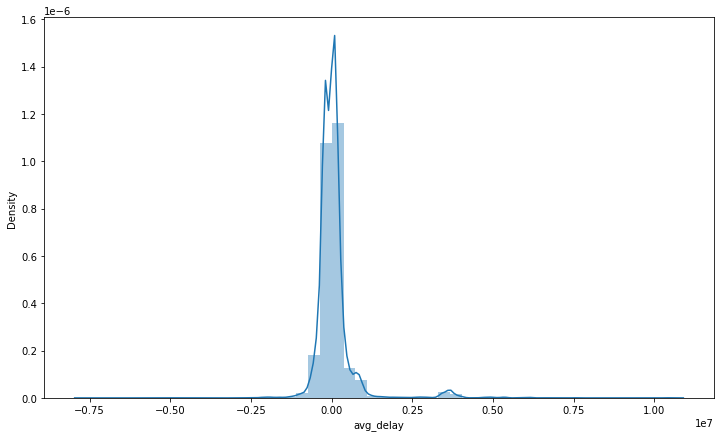

In [1402]:
plt.subplots(figsize=(12,7))
sns.distplot(y_train)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [1403]:
x_train=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

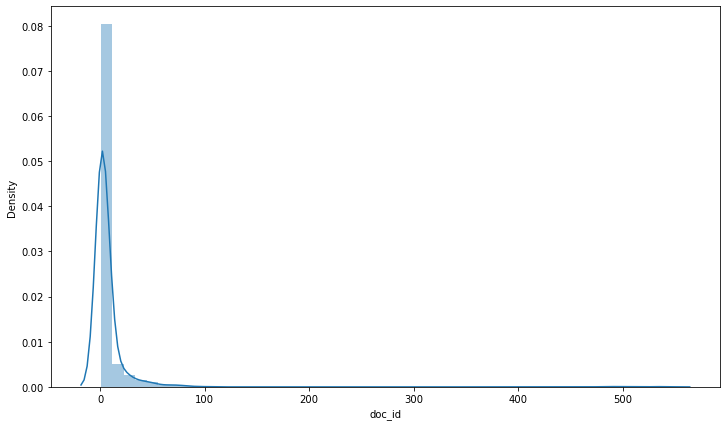

In [1404]:
plt.subplots(figsize=(12,7))
sns.distplot(x_train['doc_id'])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

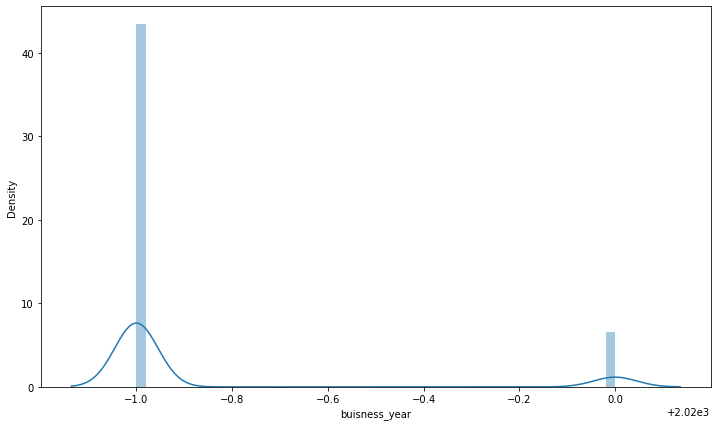

In [1405]:
#X_train['buisness_year']=X_train['buisness_year'].astype(int)
plt.subplots(figsize=(12,7))
sns.distplot(X_train['buisness_year'])

<AxesSubplot:ylabel='Density'>

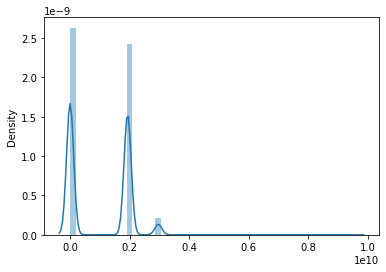

In [1406]:
sns.distplot(X_train[['buisness_year','doc_id']])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [1407]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200794332,COST foundation,2020.0,1.930448e+09,2020-01-28,2020-02-12,2020-01-28,NAAX,25391.121
1,U001,0200706844,WINC trust,2020.0,1.930517e+09,2020-02-13,2020-02-28,2020-02-13,NAA8,4444.489
2,U001,0200803720,DEC us,2019.0,1.928590e+09,2019-01-08,2019-01-24,2019-01-01,NAM4,197.988
3,U001,0200752302,KROGER,2020.0,1.930509e+09,2020-02-12,2020-02-27,2020-02-12,NAA8,45324.426
4,U001,0200974851,RESTA co,2019.0,1.929483e+09,2019-06-12,2019-06-27,2019-06-12,NAA8,1446.641
...,...,...,...,...,...,...,...,...,...,...
23489,U001,0200769623,WAL-MAR associates,2019.0,1.930152e+09,2019-11-14,2019-11-29,2019-11-14,NAH4,2414.741
23490,U001,0200793568,SUPE in,2019.0,1.930222e+09,2019-12-06,2019-12-21,2019-12-06,NAA8,28414.225
23491,U001,0100036066,GROC associates,2019.0,1.929175e+09,2019-04-22,2019-05-07,2019-04-22,NAA8,17408.524
23492,U001,200769623,WAL-MAR associates,2019.0,1.929555e+09,2019-06-28,2019-07-13,2019-06-28,NAH4,29654.023


In [1408]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132247,2.014021e+09,24046.526053
std,0.338766,2.956842e+08,32346.669688
min,2019.000000,1.928502e+09,3.066000
25%,2019.000000,1.929174e+09,3470.162500
50%,2019.000000,1.929731e+09,12314.081500
75%,2019.000000,1.930209e+09,33666.724000
max,2020.000000,9.500000e+09,442493.968000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [1409]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [1410]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [1411]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [1412]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
0,U001,1
1,U001,1
2,U001,1
3,U001,1
4,U001,1
...,...,...
23489,U001,1
23490,U001,1
23491,U001,1
23492,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [1413]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [1414]:
X_train, X_val, X_test= custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [1415]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [1416]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [1417]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [1418]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [1419]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [1420]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [1421]:
X_train['cust_number']=X_train['cust_number'].astype(np.int64)
X_train['buisness_year']=X_train['buisness_year'].astype(np.int64)
X_train['name_customer_enc']=X_train['name_customer_enc'].astype(np.int64)
X_train['cust_payment_terms_enc']=X_train['cust_payment_terms_enc'].astype(np.int64)
X_train['business_code_enc']=X_train['business_code_enc'].astype(np.int64)
X_train.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [1422]:
X_test['cust_number']=X_test['cust_number'].astype(np.int64)
X_test['buisness_year']=X_test['buisness_year'].astype(np.int64)
X_test['name_customer_enc']=X_test['name_customer_enc'].astype(np.int64)
X_test['cust_payment_terms_enc']=X_test['cust_payment_terms_enc'].astype(np.int64)
X_test['business_code_enc']=X_test['business_code_enc'].astype(np.int64)
X_test.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [1423]:
X_val['cust_number']=X_val['cust_number'].astype(np.int64)
X_val['buisness_year']=X_val['buisness_year'].astype(np.int64)
X_val['name_customer_enc']=X_val['name_customer_enc'].astype(np.int64)
X_val['cust_payment_terms_enc']=X_val['cust_payment_terms_enc'].astype(np.int64)
X_val['business_code_enc']=X_val['business_code_enc'].astype(np.int64)
X_val.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [1424]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [1425]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [1426]:
X_train['day_of_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_create_date'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_create_date'] = X_test['baseline_create_date'].dt.year



### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [1427]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [1428]:
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year


X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year



pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [1429]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [1430]:
print(X_train.dtypes)
print(X_test.dtypes)
print(X_val.dtypes)

cust_number                        int64
buisness_year                      int64
doc_id                           float64
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_baseline_create_date        int64
month_of_baseline_create_date      int64
year_of_baseline_create_date       int64
day_of_due_in_date                 int64
month_of_due_in_date               int64
year_of_due_in_date                int64
dtype: object
cust_number                        int64
buisness_year                      int64
doc_id                           float64
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
day_of_postingdate                 int64
mo

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [1431]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [1432]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [1433]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [1434]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [1435]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_postingdate',
 'month_of_baseline_create_date',
 'month_of_due_in_date',
 'day_of_baseline_create_date',
 'year_of_baseline_create_date',
 'year_of_due_in_date']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

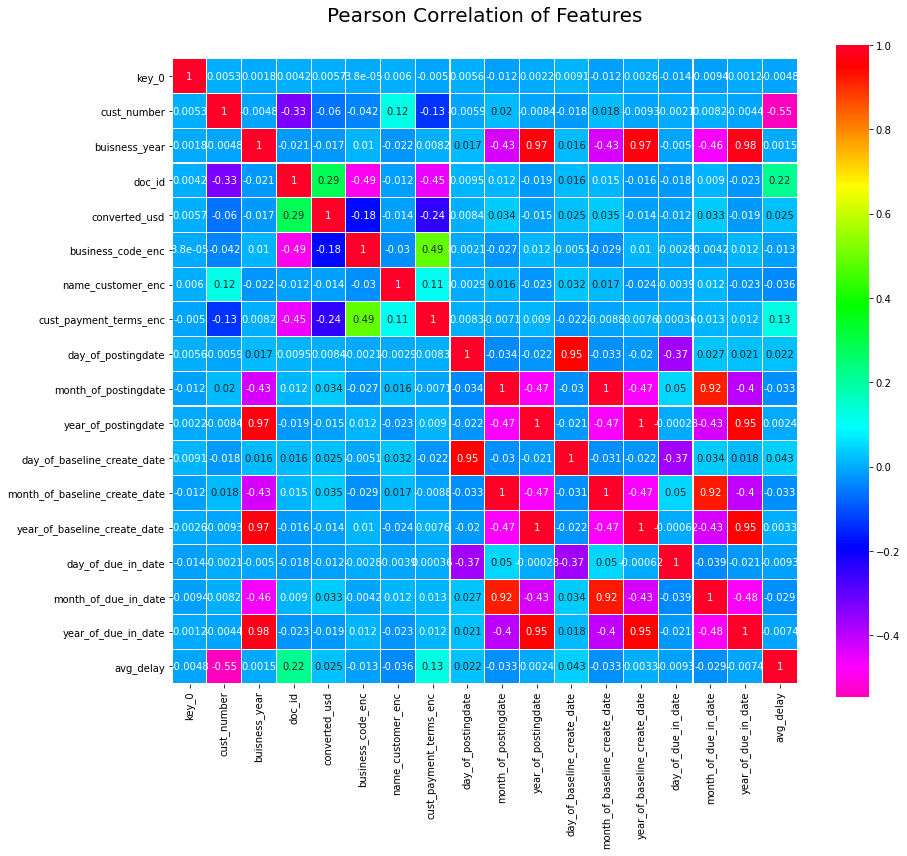

In [1436]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [1437]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [1438]:
sel.variances_

array([1.81954912e+15, 1.14757386e-01, 8.74254278e+16, 1.04626250e+09,
       2.87927752e-01, 1.07015118e+06, 1.35481309e+02, 7.55282009e+01,
       1.22549606e+01, 1.14798749e-01, 7.70243713e+01, 1.22619699e+01,
       1.14937418e-01, 7.66173615e+01, 1.20665594e+01, 1.18125269e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [1439]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [1440]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [1441]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [1442]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

521967.9807340885

### Display The Comparison Lists

In [1443]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[289747383459.23676],[0.3196741895251116],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [1444]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
vector_model=SVR()
vector_model.fit(X_train,y_train)
SVR_predicted= vector_model.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [1445]:
MSE_Score.append(mean_squared_error(y_test, SVR_predicted))
R2_Score.append(r2_score(y_test, SVR_predicted))

### Check the same for the Validation set also 

In [1446]:
SVR_predict_test= vector_model.predict(X_val)
mean_squared_error(y_val, SVR_predict_test, squared=False)

631968.0307228548

### Display The Comparison Lists

In [1447]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[289747383459.23676, 427979720344.5139],[0.3196741895251116, -0.00489483851080319],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [1448]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append("DecisionTreeRegressor")
D_regressor=DecisionTreeRegressor()
D_regressor.fit(X_train,y_train)
DR_predicted=D_regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [1449]:
MSE_Score.append(mean_squared_error(y_test, DR_predicted))
R2_Score.append(r2_score(y_test, DR_predicted))

### Check the same for the Validation set also 

In [1450]:
DR_predict_test= D_regressor.predict(X_val)
mean_squared_error(y_val, DR_predict_test, squared=False)

475762.34659087466

### Display The Comparison Lists

In [1451]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegressor'],[289747383459.23676, 427979720344.5139, 320012557974.1581],[0.3196741895251116, -0.00489483851080319, 0.24861166901084275],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [1452]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append("RandomForestRegressor")
RF_regresssor=RandomForestRegressor()
RF_regresssor.fit(X_train,y_train)
RF_predicted=RF_regresssor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [1453]:
MSE_Score.append(mean_squared_error(y_test, RF_predicted))
R2_Score.append(r2_score(y_test, RF_predicted))

### Check the same for the Validation set also 

In [1454]:
RF_predict_test=RF_regresssor.predict(X_val)
mean_squared_error(y_val, RF_predict_test, squared=False)

335188.12994105037

### Display The Comparison Lists


In [1455]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegressor', 'RandomForestRegressor'],[289747383459.23676, 427979720344.5139, 320012557974.1581, 151973965435.97656],[0.3196741895251116, -0.00489483851080319, 0.24861166901084275, 0.6431656777295484],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [1456]:
import xgboost as xgb
Algorithm.append('Extreme Gradient Boost Regression')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [1457]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [1458]:
predict_test=regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

335091.43437536684

### Display The Comparison Lists


In [1459]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'Extreme Gradient Boost Regression'],[289747383459.23676, 427979720344.5139, 320012557974.1581, 151973965435.97656, 136674106708.55748],[0.3196741895251116, -0.00489483851080319, 0.24861166901084275, 0.6431656777295484, 0.6790896907943533],

## You need to make the comparison list into a comparison dataframe 

In [1460]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.897474e+11,0.319674
1,Support Vector Regression,4.279797e+11,-0.004895
2,DecisionTreeRegressor,3.200126e+11,0.248612
3,RandomForestRegressor,1.519740e+11,0.643166
4,Extreme Gradient Boost Regression,1.366741e+11,0.679090


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [1461]:
"""from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params={
 #"base_score"       : [0.5,0.6,0.9,1.0,1.1],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7],
 "n_estimators"     : [50,100,120,150,180]
}
regressor=xgb.XGBRegressor()
random_search=RandomizedSearchCV(regressor,param_distributions=params,n_iter=6,n_jobs=-1,cv=6,verbose=3)
random_search.fit(X_train, y_train)
random_search.best_estimator_
regressorfinal = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=12, min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)"""
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

In [1462]:
X_train

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_due_in_date,month_of_due_in_date,year_of_due_in_date
0,200794332,2020,1.930448e+09,25391.121,1,630,20,28,1,2020,28,1,2020,12,2,2020
1,200706844,2020,1.930517e+09,4444.489,1,3069,18,13,2,2020,13,2,2020,28,2,2020
2,200803720,2019,1.928590e+09,197.988,1,728,36,8,1,2019,1,1,2019,24,1,2019
3,200752302,2020,1.930509e+09,45324.426,1,1580,18,12,2,2020,12,2,2020,27,2,2020
4,200974851,2019,1.929483e+09,1446.641,1,2315,18,12,6,2019,12,6,2019,27,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23489,200769623,2019,1.930152e+09,2414.741,1,2996,32,14,11,2019,14,11,2019,29,11,2019
23490,200793568,2019,1.930222e+09,28414.225,1,2658,18,6,12,2019,6,12,2019,21,12,2019
23491,100036066,2019,1.929175e+09,17408.524,1,1172,18,22,4,2019,22,4,2019,7,5,2019
23492,200769623,2019,1.929555e+09,29654.023,1,2996,32,28,6,2019,28,6,2019,13,7,2019


### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [1463]:
mean_squared_error(y_test,predictedfinal,squared=False)

369694.61276647984

### Calculate the mean Square Error for validation dataset

In [1464]:
mean_squared_error(y_val,predict_testfinal,squared=False)

335091.43437536684

### Calculate the R2 score for test

In [1465]:
r2_score(y_test, predictedfinal)

0.6790896907943533

### Calculate the R2 score for Validation

In [1466]:
r2_score(y_val, predict_testfinal)

0.7174495512790542

### Calculate the Accuracy for train Dataset 

In [1467]:
regressorfinal.score(X_train,y_train)

0.9572418832328392

### Calculate the accuracy for validation

In [1468]:
regressorfinal.score(X_val,y_val)

0.7174495512790542

### Calculate the accuracy for test

In [1469]:
regressorfinal.score(X_test,y_test)

0.6790896907943533

## Specify the reason behind choosing your machine learning model 

- Note : XGBoost gives the most R2_score with less mean squared error
         If Hyper parameter Tuning is done the Test Accuracy is coming 76% and Validation Accuracy is Coming 79%
         Calculate the Mean Square Error for test dataset:  315167.8492569738
         Calculate the mean Square Error for validation dataset:  287490.34670049476
         Calculate the R2 score for test:  0.7667717030636192
         Calculate the R2 score for Validation:  0.7920227260014681
         Calculate the Accuracy for train Dataset:  0.9863133465273767
         Calculate the accuracy for validation:  0.7920227260014681
         Calculate the accuracy for test:  0.7667717030636192
- Note  : Hyper parameter tuning is not done here but the code is commented out

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [1470]:
df_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,3299.700
1,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,7821.114
2,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,2467.913
3,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,84773.955
4,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,2608.242
...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,9180.493
9677,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,6229.797
9678,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3476.942
9679,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1399.048


### Check for the number of rows and columns in the nulldata

In [1471]:
df_test.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [1472]:
df_test.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,24670.052531
std,0.0,2.673629e+08,29965.999463
min,2020.0,1.930535e+09,0.504000
25%,2020.0,1.930658e+09,4159.743000
50%,2020.0,1.930731e+09,13647.935000
75%,2020.0,1.930818e+09,35090.699000
max,2020.0,2.960636e+09,457551.360000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [1473]:
nulldata=df_test.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [1474]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [1475]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [1476]:
nulldata['day_of_clear_date'] = nulldata['clear_date'].dt.day
nulldata['month_of_clear_date'] = nulldata['clear_date'].dt.month
nulldata['year_of_clear_date'] = nulldata['clear_date'].dt.year


nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year


nulldata['day_of_due_in_date'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due_in_date'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due_in_date'] = nulldata['due_in_date'].dt.year


nulldata['day_of_baseline_create_date'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_baseline_create_date'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_baseline_create_date'] = nulldata['baseline_create_date'].dt.year



### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [1477]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [1478]:
nulldata['cust_number']=nulldata['cust_number'].astype(np.int64)
nulldata['buisness_year']=nulldata['buisness_year'].astype(np.int64)
nulldata['name_customer_enc']=nulldata['name_customer_enc'].astype(np.int64)
nulldata['cust_payment_terms_enc']=nulldata['cust_payment_terms_enc'].astype(np.int64)
nulldata['business_code_enc']=nulldata['business_code_enc'].astype(np.int64)
nulldata.dtypes

business_code                            object
cust_number                               int64
name_customer                            object
clear_date                       datetime64[ns]
buisness_year                             int64
doc_id                                  float64
posting_date                     datetime64[ns]
due_in_date                      datetime64[ns]
baseline_create_date             datetime64[ns]
cust_payment_terms                       object
converted_usd                           float64
business_code_enc                         int64
day_of_clear_date                       float64
month_of_clear_date                     float64
year_of_clear_date                      float64
day_of_postingdate                        int64
month_of_postingdate                      int64
year_of_postingdate                       int64
day_of_due_in_date                        int64
month_of_due_in_date                      int64
year_of_due_in_date                     

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [1479]:
nulldata=nulldata.drop(labels=["business_code","baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms","day_of_clear_date","month_of_clear_date","year_of_clear_date"],axis=1,inplace=False)

### Check the information of the "nulldata" dataframe

In [1480]:
nulldata.shape

(9681, 16)

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [1481]:
print(X_test.info())
print(nulldata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7832 entries, 0 to 7831
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_number                    7832 non-null   int64  
 1   buisness_year                  7832 non-null   int64  
 2   doc_id                         7832 non-null   float64
 3   converted_usd                  7832 non-null   float64
 4   business_code_enc              7832 non-null   int64  
 5   name_customer_enc              7832 non-null   int64  
 6   cust_payment_terms_enc         7832 non-null   int64  
 7   day_of_postingdate             7832 non-null   int64  
 8   month_of_postingdate           7832 non-null   int64  
 9   year_of_postingdate            7832 non-null   int64  
 10  day_of_baseline_create_date    7832 non-null   int64  
 11  month_of_baseline_create_date  7832 non-null   int64  
 12  year_of_baseline_create_date   7832 non-null   i

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [1482]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baseline_create_date', 'month_of_baseline_create_date',
       'year_of_baseline_create_date', 'day_of_due_in_date',
       'month_of_due_in_date', 'year_of_due_in_date'],
      dtype='object')

In [1483]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due_in_date', 'month_of_due_in_date',
       'year_of_due_in_date', 'day_of_baseline_create_date',
       'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [1484]:
nulldata=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baseline_create_date', 'month_of_baseline_create_date',
       'year_of_baseline_create_date', 'day_of_due_in_date',
       'month_of_due_in_date', 'year_of_due_in_date']]

### Display the Final Dataset

In [1485]:
nulldata

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_due_in_date,month_of_due_in_date,year_of_due_in_date
0,140105686,2020,2.960623e+09,3299.700,66,2714,5,30,3,2020,31,3,2020,10,4,2020
1,200744019,2020,1.930659e+09,7821.114,66,2798,18,19,3,2020,19,3,2020,3,4,2020
2,200418007,2020,1.930611e+09,2467.913,66,89,18,11,3,2020,11,3,2020,26,3,2020
3,200739534,2020,1.930788e+09,84773.955,66,2043,18,15,4,2020,15,4,2020,30,4,2020
4,200353024,2020,1.930817e+09,2608.242,66,733,34,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,200769623,2020,1.930625e+09,9180.493,66,3001,32,10,3,2020,10,3,2020,25,3,2020
9677,200769623,2020,1.930851e+09,6229.797,66,2999,32,3,5,2020,3,5,2020,18,5,2020
9678,200148860,2020,1.930638e+09,3476.942,66,811,18,11,3,2020,11,3,2020,26,3,2020
9679,200900909,2020,1.930702e+09,1399.048,66,2761,18,25,3,2020,25,3,2020,9,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [1486]:
final_result=regressorfinal.predict(nulldata)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [1487]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [1488]:
final_result=pd.DataFrame(final_result)
final_result

,avg_delay
0,1.394071e+06
1,8.613814e+05
2,-3.053849e+05
3,4.408605e+05
4,-1.524732e+05
...,...
9676,1.759823e+05
9677,7.647965e+04
9678,-3.125023e+05
9679,4.818598e+05


### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [1489]:
nulldata.reset_index(drop=True,inplace=True)
Final = nulldata.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [1490]:
Final

,key_0,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_due_in_date,month_of_due_in_date,year_of_due_in_date,avg_delay
0,0,140105686,2020,2.960623e+09,3299.700,66,2714,5,30,3,2020,31,3,2020,10,4,2020,1.394071e+06
1,1,200744019,2020,1.930659e+09,7821.114,66,2798,18,19,3,2020,19,3,2020,3,4,2020,8.613814e+05
2,2,200418007,2020,1.930611e+09,2467.913,66,89,18,11,3,2020,11,3,2020,26,3,2020,-3.053849e+05
3,3,200739534,2020,1.930788e+09,84773.955,66,2043,18,15,4,2020,15,4,2020,30,4,2020,4.408605e+05
4,4,200353024,2020,1.930817e+09,2608.242,66,733,34,23,4,2020,16,4,2020,26,4,2020,-1.524732e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,9676,200769623,2020,1.930625e+09,9180.493,66,3001,32,10,3,2020,10,3,2020,25,3,2020,1.759823e+05
9677,9677,200769623,2020,1.930851e+09,6229.797,66,2999,32,3,5,2020,3,5,2020,18,5,2020,7.647965e+04
9678,9678,200148860,2020,1.930638e+09,3476.942,66,811,18,11,3,2020,11,3,2020,26,3,2020,-3.125023e+05
9679,9679,200900909,2020,1.930702e+09,1399.048,66,2761,18,25,3,2020,25,3,2020,9,4,2020,4.818598e+05


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [1491]:
Final.shape

(9681, 18)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [1492]:
Final1=Final.copy()
def to_Day(n):
    return pd.Timedelta(days=n)
Final['due_in_date']=Final['year_of_due_in_date'].astype(str)+Final['month_of_due_in_date'].astype(str)+Final['day_of_due_in_date'].astype(str)
Final['due_in_date']=pd.to_datetime(Final['due_in_date'],format="%Y%m%d" )
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1).astype(int)
Final['avg_delay'] = Final.apply(lambda row: to_Day(row.avg_delay), axis = 1)
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [1493]:
Final['clear_date']

0      2020-04-26
1      2020-04-12
2      2020-03-22
3      2020-05-05
4      2020-04-24
          ...    
9676   2020-03-27
9677   2020-05-18
9678   2020-03-22
9679   2020-04-14
9680   2020-05-08
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [1494]:
Final['avg_delay'] = Final1.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [1495]:
Final['avg_delay']

0       16.0
1        9.0
2       -4.0
3        5.0
4       -2.0
        ... 
9676     2.0
9677     0.0
9678    -4.0
9679     5.0
9680     2.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [1496]:
bins=[-100,0,15,30,45,60,100]
labels =['Before Due_Date','0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [1497]:
Final=Final.drop(labels=['key_0','avg_delay'],axis=1,inplace=False)

### Display the count of each categoty of new "Aging Bucket" column 

In [1498]:
Final['Aging Bucket'].value_counts()

0-15               7475
Before Due_Date    2043
16-30                79
31-45                63
46-60                13
Greatar than 60       8
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [1499]:
Final

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_due_in_date,month_of_due_in_date,year_of_due_in_date,due_in_date,clear_date,Aging Bucket
0,140105686,2020,2.960623e+09,3299.700,66,2714,5,30,3,2020,31,3,2020,10,4,2020,2020-04-10,2020-04-26,16-30
1,200744019,2020,1.930659e+09,7821.114,66,2798,18,19,3,2020,19,3,2020,3,4,2020,2020-04-03,2020-04-12,0-15
2,200418007,2020,1.930611e+09,2467.913,66,89,18,11,3,2020,11,3,2020,26,3,2020,2020-03-26,2020-03-22,Before Due_Date
3,200739534,2020,1.930788e+09,84773.955,66,2043,18,15,4,2020,15,4,2020,30,4,2020,2020-04-30,2020-05-05,0-15
4,200353024,2020,1.930817e+09,2608.242,66,733,34,23,4,2020,16,4,2020,26,4,2020,2020-04-26,2020-04-24,Before Due_Date
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,200769623,2020,1.930625e+09,9180.493,66,3001,32,10,3,2020,10,3,2020,25,3,2020,2020-03-25,2020-03-27,0-15
9677,200769623,2020,1.930851e+09,6229.797,66,2999,32,3,5,2020,3,5,2020,18,5,2020,2020-05-18,2020-05-18,0-15
9678,200148860,2020,1.930638e+09,3476.942,66,811,18,11,3,2020,11,3,2020,26,3,2020,2020-03-26,2020-03-22,Before Due_Date
9679,200900909,2020,1.930702e+09,1399.048,66,2761,18,25,3,2020,25,3,2020,9,4,2020,2020-04-09,2020-04-14,0-15


### Store this dataframe into the .csv format

In [1500]:
Final.to_csv("HRC80014W_Tathagata_Sengupta.csv")

# END OF THE PROJECT